<a href="https://colab.research.google.com/github/the-aryan-1712/pClub_Seccy_task/blob/main/Gender_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [37]:
WithMask = '/content/drive/MyDrive/student_search_data_masked'


In [38]:
female = 'https://raw.githubusercontent.com/the-aryan-1712/pClub_Seccy_task/main/task%203/females.csv?token=GHSAT0AAAAAACSN4H3IVN4MISFC7UW2OK7YZSPBITA'
male = 'https://raw.githubusercontent.com/the-aryan-1712/pClub_Seccy_task/main/task%203/males.csv?token=GHSAT0AAAAAACSN4H3IYE67WJSPHZ4VEGHWZSPBLGQ'
female = pd.read_csv(female)
male = pd.read_csv(male)
print(type(male))

<class 'pandas.core.frame.DataFrame'>


In [39]:
male_np = male.values
print(type(male_np))
def convert_to_dict(x):
    return {x: 1}

vectorized_func = np.vectorize(convert_to_dict)
male_dict = vectorized_func(male_np)
print(male_dict)



<class 'numpy.ndarray'>
[[{230001: 1}]
 [{230003: 1}]
 [{230004: 1}]
 [{230005: 1}]
 [{230006: 1}]
 [{230008: 1}]
 [{230010: 1}]
 [{230012: 1}]
 [{230013: 1}]
 [{230014: 1}]
 [{230015: 1}]
 [{230016: 1}]
 [{230017: 1}]
 [{230018: 1}]
 [{230019: 1}]
 [{230020: 1}]
 [{230021: 1}]
 [{230022: 1}]
 [{230023: 1}]
 [{230025: 1}]
 [{230026: 1}]
 [{230027: 1}]
 [{230028: 1}]
 [{230029: 1}]
 [{230030: 1}]
 [{230031: 1}]
 [{230032: 1}]
 [{230033: 1}]
 [{230034: 1}]
 [{230035: 1}]
 [{230036: 1}]
 [{230037: 1}]
 [{230038: 1}]
 [{230039: 1}]
 [{230040: 1}]
 [{230041: 1}]
 [{230042: 1}]
 [{230043: 1}]
 [{230044: 1}]
 [{230045: 1}]
 [{230046: 1}]
 [{230047: 1}]
 [{230048: 1}]
 [{230049: 1}]
 [{230050: 1}]
 [{230052: 1}]
 [{230053: 1}]
 [{230054: 1}]
 [{230055: 1}]
 [{230056: 1}]
 [{230057: 1}]
 [{230058: 1}]
 [{230059: 1}]
 [{230060: 1}]
 [{230062: 1}]
 [{230065: 1}]
 [{230066: 1}]
 [{230067: 1}]
 [{230068: 1}]
 [{230069: 1}]
 [{230070: 1}]
 [{230071: 1}]
 [{230072: 1}]
 [{230073: 1}]
 [{230074: 1}]
 

In [40]:
female_np = female.values
print(type(female_np))
def convert_to_dict(x):
    return {x: 0}

vectorized_func = np.vectorize(convert_to_dict)
female_dict = vectorized_func(female_np)
print(female_dict)
print(type(female_dict))


<class 'numpy.ndarray'>
[[{230002: 0}]
 [{230007: 0}]
 [{230009: 0}]
 [{230011: 0}]
 [{230024: 0}]
 [{230051: 0}]
 [{230061: 0}]
 [{230063: 0}]
 [{230064: 0}]
 [{230082: 0}]
 [{230090: 0}]
 [{230106: 0}]
 [{230125: 0}]
 [{230132: 0}]
 [{230133: 0}]
 [{230134: 0}]
 [{230135: 0}]
 [{230136: 0}]
 [{230137: 0}]
 [{230145: 0}]
 [{230146: 0}]
 [{230148: 0}]
 [{230160: 0}]
 [{230161: 0}]
 [{230162: 0}]
 [{230163: 0}]
 [{230166: 0}]
 [{230171: 0}]
 [{230176: 0}]
 [{230177: 0}]
 [{230178: 0}]
 [{230179: 0}]
 [{230180: 0}]
 [{230187: 0}]
 [{230206: 0}]
 [{230208: 0}]
 [{230235: 0}]
 [{230245: 0}]
 [{230275: 0}]
 [{230277: 0}]
 [{230278: 0}]
 [{230279: 0}]
 [{230291: 0}]
 [{230295: 0}]
 [{230301: 0}]
 [{230307: 0}]
 [{230308: 0}]
 [{230309: 0}]
 [{230311: 0}]
 [{230324: 0}]
 [{230328: 0}]
 [{230329: 0}]
 [{230333: 0}]
 [{230360: 0}]
 [{230363: 0}]
 [{230364: 0}]
 [{230372: 0}]
 [{230373: 0}]
 [{230376: 0}]
 [{230378: 0}]
 [{230388: 0}]
 [{230389: 0}]
 [{230393: 0}]
 [{230394: 0}]
 [{230397: 0}]
 

In [51]:
roll_gender_dict = np.concatenate((male_dict, female_dict), axis=0)



roll_gender_dict = {list(item.keys())[0]: list(item.values())[0] for sublist in roll_gender_dict  for item in sublist}
print(roll_gender_dict[230205])


1


In [53]:
image_paths = []
gender_labels = []

for filename in tqdm(os.listdir(WithMask)):
    image_path = os.path.join(WithMask, filename)
    temp = filename.split('_')
    gender = int(roll_gender_dict[int(temp[0])])
    image_paths.append(image_path)
    gender_labels.append(gender)

  0%|          | 0/1197 [00:00<?, ?it/s]

In [54]:
WithMask_df = pd.DataFrame()
WithMask_df['image'], WithMask_df['gender'] = image_paths, gender_labels
WithMask_df.head()

,image,gender
0,/content/drive/MyDrive/student_search_data_mas...,1
1,/content/drive/MyDrive/student_search_data_mas...,1
2,/content/drive/MyDrive/student_search_data_mas...,1
3,/content/drive/MyDrive/student_search_data_mas...,1
4,/content/drive/MyDrive/student_search_data_mas...,1


<Axes: xlabel='gender'>

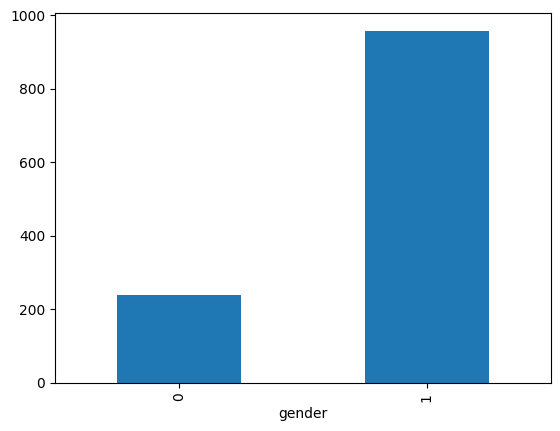

In [57]:
WithMask_df.groupby('gender')['image'].count().plot(kind='bar')

In [58]:
gender_dict = {0:'Female', 1:'Male'}


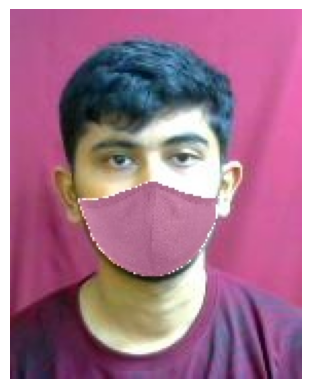

In [59]:
from PIL import Image
img = Image.open(WithMask_df['image'][0])
plt.axis('off')
plt.imshow(img);

In [60]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    # ignore this step if using RGB
    features = features.reshape(len(features),128, 128, 1)
    return features

In [61]:
WithMask_X = extract_features(WithMask_df['image'])
test_X= extract_features(test_df['image'])

  0%|          | 0/1197 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

In [62]:
WithMask_X.shape


[1 1 1 ... 1 0 1]


In [63]:
WithMask_X = WithMask_X/255.0


In [65]:
inputs = Input((input_shape))

conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)


dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)

model = Model(inputs=[inputs], outputs=[output_1])

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy', 'mae'])

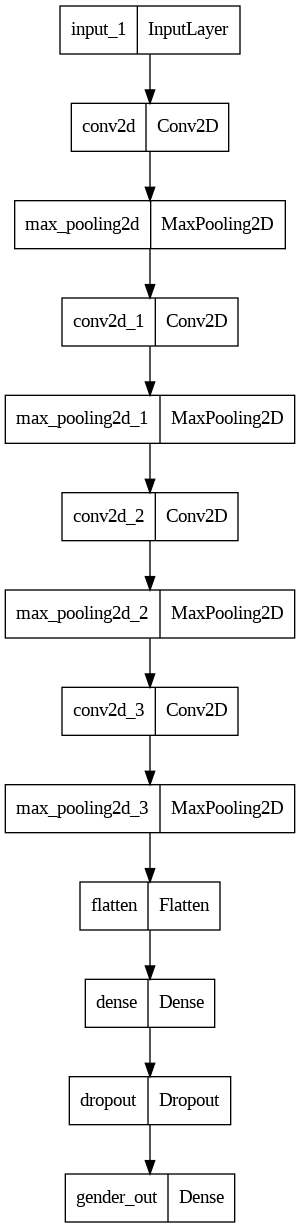

In [66]:


from tensorflow.keras.utils import plot_model
plot_model(model)



In [67]:

history = model.fit(x=WithMask_X, y=WithMask_y, batch_size=32, epochs=30, validation_split=0.2)


Epoch 1/30
30/30 [==============================] - 10s 58ms/step - loss: 0.5654 - accuracy: 0.7701 - mae: 0.3632 - val_loss: 0.5484 - val_accuracy: 0.8250 - val_mae: 0.4115
Epoch 2/30
30/30 [==============================] - 1s 19ms/step - loss: 0.3612 - accuracy: 0.8506 - mae: 0.2418 - val_loss: 0.1615 - val_accuracy: 0.9500 - val_mae: 0.0858
Epoch 3/30
30/30 [==============================] - 1s 19ms/step - loss: 0.1865 - accuracy: 0.9237 - mae: 0.1072 - val_loss: 0.1095 - val_accuracy: 0.9833 - val_mae: 0.0565
Epoch 4/30
30/30 [==============================] - 1s 19ms/step - loss: 0.1068 - accuracy: 0.9666 - mae: 0.0640 - val_loss: 0.0893 - val_accuracy: 0.9833 - val_mae: 0.0340
Epoch 5/30
30/30 [==============================] - 1s 19ms/step - loss: 0.1311 - accuracy: 0.9425 - mae: 0.0779 - val_loss: 0.1207 - val_accuracy: 0.9875 - val_mae: 0.0572
Epoch 6/30
30/30 [==============================] - 1s 19ms/step - loss: 0.0852 - accuracy: 0.9707 - mae: 0.0488 - val_loss: 0.1635 - 

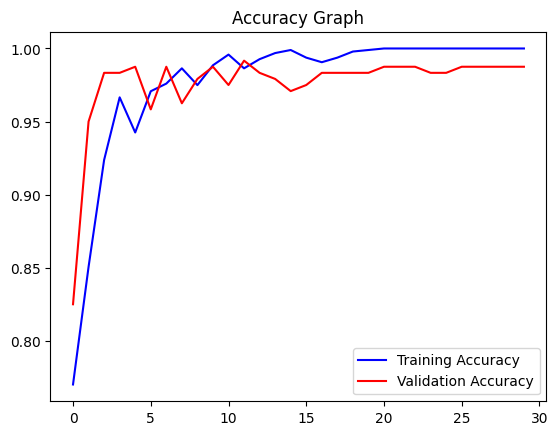

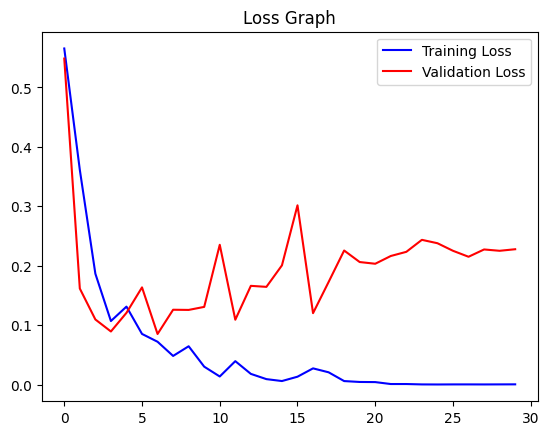

In [68]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [70]:
!pip install --upgrade gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.0 MB/s

###    
# Run Below Gradio Link (for testing WithMask folder data)

In [73]:
import gradio as gr

from keras.models import load_model
import matplotlib.pyplot as plt
from io import BytesIO
import base64



def predict_gender(image_index):

    if image_index < 0 or image_index >= len(WithMask_y):
        return "Invalid index!!! Please enter something different", "Invalid index!!! Please enter something different", ""


    original_gender = gender_dict[WithMask_y[image_index]]


    pred = model.predict(WithMask_X[image_index].reshape(1, 128, 128, 1))
    pred_gender = gender_dict[round(pred[0][0])]


    print(f"Image Index: {image_index}")
    print(f"Original Gender: {original_gender}")
    print(f"Predicted Gender: {pred_gender}")


    plt.figure()
    plt.axis('off')
    plt.imshow(WithMask_X[image_index].reshape(128, 128), cmap='gray')

    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    buf.seek(0)
    image_base64 = base64.b64encode(buf.read()).decode('utf-8')

    return original_gender, pred_gender, f'<img src="data:image/png;base64,{image_base64}"/>'


interface = gr.Interface(
    fn=predict_gender,
    inputs=gr.Number(label="Image Index"),
    outputs=[
        gr.Textbox(label="Original Gender"),
        gr.Textbox(label="Predicted Gender"),
        gr.HTML(label="Image")
    ],
    title="Gender Prediction for Student Search data",
    description="Input an image index to get the original and predicted gender along with the image."
)


interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f5c42102cd79f9d522.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
